In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("../data/cleaned_train_1.csv")
test = pd.read_csv("../data/cleaned_test_1.csv")

In [3]:
X = train.drop(["Unnamed: 0", "user_id", "MRG", "CHURN"], axis =1)
y = train["CHURN"]

X_test = test.drop(["Unnamed: 0", "user_id", "MRG"], axis = 1)

## SPLITING DATA INTO TRAIN AND VALIDATION SETS

In [5]:
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 0)

In [7]:
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt

def evaluateModel(model):
    #model = XGBClassifier(n_estimator = est, learning_rate = lr, max_depth = md)
    model.fit(X_train, y_train, 
              eval_set=[(X_val, y_val)],
              
              early_stopping_rounds = 100,
              verbose = 50
             )

def kfoldPrediction(model, file_name, splits):
    kf = StratifiedKFold(n_splits=splits,shuffle=True)
    #pipe = Pipeline([("scaler", StandardScaler()), ("regressor", model)])
    prediction = np.zeros(len(test))
    for (train_index,test_index) in kf.split(X, y):
        X_train, X_val =X.iloc[train_index],X.iloc[test_index]
        y_train, y_val = y.iloc[train_index],y.iloc[test_index]

        model.fit(X_train,y_train,
                 eval_set=[(X_val, y_val)],
              
              early_stopping_rounds = 100,
              verbose = 50)
        prediction += (model.predict_proba(X_test))[:,1]
    
    prediction = prediction/splits
    pd.DataFrame({"user_id": test["user_id"], "CHURN": prediction}).to_csv("../submission-files/"+file_name, index = False)
    

def plot_graphs(train, val, metric):
  plt.plot(train)
  plt.plot(val)
  plt.xlabel("Iterations")
  plt.ylabel(metric)
  plt.legend(["train", "val"])
  plt.show()

In [12]:
cat = CatBoostClassifier(cat_features = ["REGION", "TENURE", "TOP_PACK"], eval_metric='Logloss')
evaluateModel(cat)

Learning rate set to 0.142986
0:	learn: 0.4912573	test: 0.4913715	best: 0.4913715 (0)	total: 666ms	remaining: 11m 5s
50:	learn: 0.2521717	test: 0.2541411	best: 0.2541411 (50)	total: 33.8s	remaining: 10m 29s
100:	learn: 0.2511767	test: 0.2537772	best: 0.2537772 (100)	total: 1m 5s	remaining: 9m 42s
150:	learn: 0.2503748	test: 0.2535772	best: 0.2535757 (149)	total: 1m 36s	remaining: 9m 5s
200:	learn: 0.2495780	test: 0.2535018	best: 0.2535008 (189)	total: 2m 8s	remaining: 8m 31s
250:	learn: 0.2488844	test: 0.2535382	best: 0.2534936 (209)	total: 2m 40s	remaining: 7m 59s
300:	learn: 0.2482191	test: 0.2535114	best: 0.2534936 (209)	total: 3m 12s	remaining: 7m 28s
350:	learn: 0.2476276	test: 0.2534640	best: 0.2534480 (334)	total: 3m 46s	remaining: 6m 57s
400:	learn: 0.2470801	test: 0.2535313	best: 0.2534480 (334)	total: 4m 18s	remaining: 6m 25s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.2534480246
bestIteration = 334

Shrink model to first 335 iterations.


In [15]:
results = cat.evals_result_
#results
log_loss_train = results["learn"]["Logloss"]
#log_loss_train
log_loss_val = results["validation"]["Logloss"]

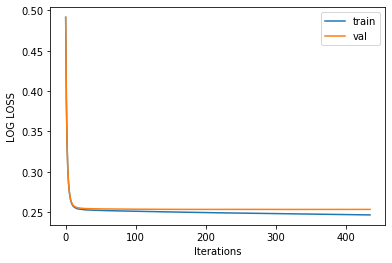

In [16]:
plot_graphs(log_loss_train, log_loss_val, "LOG LOSS")

In [24]:
#kfoldPrediction(cat, "default-cat-split-10.csv", 10)

In [10]:
cat = CatBoostClassifier(cat_features = ["REGION", "TENURE", "TOP_PACK"], eval_metric='Logloss', n_estimators = 1500, learning_rate = 0.11)
evaluateModel(cat)

0:	learn: 0.5290649	test: 0.5291589	best: 0.5291589 (0)	total: 791ms	remaining: 19m 45s
50:	learn: 0.2525242	test: 0.2542646	best: 0.2542646 (50)	total: 30.6s	remaining: 14m 28s
100:	learn: 0.2515753	test: 0.2538273	best: 0.2538273 (100)	total: 59.8s	remaining: 13m 48s
150:	learn: 0.2508293	test: 0.2536171	best: 0.2536170 (149)	total: 1m 31s	remaining: 13m 35s
200:	learn: 0.2501819	test: 0.2535446	best: 0.2535393 (193)	total: 2m 3s	remaining: 13m 16s
250:	learn: 0.2494787	test: 0.2534688	best: 0.2534688 (250)	total: 2m 34s	remaining: 12m 48s
300:	learn: 0.2489876	test: 0.2534396	best: 0.2534170 (284)	total: 3m 5s	remaining: 12m 19s
350:	learn: 0.2485312	test: 0.2534128	best: 0.2533997 (343)	total: 3m 34s	remaining: 11m 43s
400:	learn: 0.2480624	test: 0.2534183	best: 0.2533997 (343)	total: 4m 4s	remaining: 11m 11s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.2533997236
bestIteration = 343

Shrink model to first 344 iterations.


In [23]:
cat = CatBoostClassifier(cat_features = ["REGION", "TENURE", "TOP_PACK"], eval_metric='Logloss', n_estimators = 1500, learning_rate = 0.11)
#kfoldPrediction(cat, "default-cat-1500-011-split-10.csv", 10)
#kfoldPrediction(cat, "default-cat-150-011-split-5.csv", 5)

In [13]:
cat = CatBoostClassifier(cat_features = ["REGION", "TENURE", "TOP_PACK"], eval_metric='Logloss', n_estimators = 1500, learning_rate = 0.15)
evaluateModel(cat)

0:	learn: 0.4838340	test: 0.4839522	best: 0.4839522 (0)	total: 825ms	remaining: 20m 37s
50:	learn: 0.2522159	test: 0.2542266	best: 0.2542266 (50)	total: 38.5s	remaining: 18m 13s
100:	learn: 0.2510986	test: 0.2537940	best: 0.2537940 (100)	total: 1m 16s	remaining: 17m 37s
150:	learn: 0.2501899	test: 0.2536593	best: 0.2536337 (134)	total: 1m 55s	remaining: 17m 14s
200:	learn: 0.2493575	test: 0.2535771	best: 0.2535715 (197)	total: 2m 35s	remaining: 16m 42s
250:	learn: 0.2486577	test: 0.2536030	best: 0.2535467 (220)	total: 3m 15s	remaining: 16m 14s
300:	learn: 0.2479530	test: 0.2537370	best: 0.2535467 (220)	total: 3m 58s	remaining: 15m 49s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.253546746
bestIteration = 220

Shrink model to first 221 iterations.


In [14]:
cat.feature_importances_

array([48.33711089,  0.91666214,  2.29889057,  1.65281142,  2.16396199,
        1.67006657,  1.36033842,  4.36791205,  1.90537181,  1.66947188,
        0.74567844,  0.46097165,  0.35340178, 30.72087347,  0.85245721,
        0.52401972])

In [15]:
cat.feature_names_

['REGION',
 'TENURE',
 'MONTANT',
 'FREQUENCE_RECH',
 'REVENUE',
 'ARPU_SEGMENT',
 'FREQUENCE',
 'DATA_VOLUME',
 'ON_NET',
 'ORANGE',
 'TIGO',
 'ZONE1',
 'ZONE2',
 'REGULARITY',
 'TOP_PACK',
 'FREQ_TOP_PACK']

In [16]:
cat = CatBoostClassifier(cat_features = ["REGION", "TENURE", "TOP_PACK"], eval_metric='Logloss', max_depth = 3)
evaluateModel(cat)

Learning rate set to 0.142986
0:	learn: 0.5124449	test: 0.5121766	best: 0.5121766 (0)	total: 713ms	remaining: 11m 52s
50:	learn: 0.2539679	test: 0.2554407	best: 0.2554407 (50)	total: 27.5s	remaining: 8m 32s
100:	learn: 0.2530778	test: 0.2546221	best: 0.2546221 (100)	total: 56s	remaining: 8m 18s
150:	learn: 0.2526777	test: 0.2543881	best: 0.2543858 (149)	total: 1m 22s	remaining: 7m 44s
200:	learn: 0.2523504	test: 0.2542106	best: 0.2542042 (199)	total: 1m 49s	remaining: 7m 16s
250:	learn: 0.2521024	test: 0.2541168	best: 0.2541168 (250)	total: 2m 15s	remaining: 6m 45s
300:	learn: 0.2519137	test: 0.2540212	best: 0.2540186 (299)	total: 2m 42s	remaining: 6m 17s
350:	learn: 0.2517153	test: 0.2539417	best: 0.2539392 (347)	total: 3m 9s	remaining: 5m 49s
400:	learn: 0.2515302	test: 0.2538453	best: 0.2538435 (396)	total: 3m 36s	remaining: 5m 23s
450:	learn: 0.2513738	test: 0.2537904	best: 0.2537904 (450)	total: 4m 3s	remaining: 4m 56s
500:	learn: 0.2512543	test: 0.2537765	best: 0.2537664 (470)	to

In [22]:
cat = CatBoostClassifier(cat_features = ["REGION", "TENURE", "TOP_PACK"], eval_metric='Logloss', max_depth = 3)
#kfoldPrediction(cat, "default-cat-md-3-split-10.csv", 10)
#kfoldPrediction(cat, "default-cat-md-3-split-5.csv", 5)

In [21]:
cat = CatBoostClassifier(cat_features = ["REGION", "TENURE", "TOP_PACK"], eval_metric='Logloss', max_depth = 3, n_estimators = 1500)
#kfoldPrediction(cat, "default-cat-md-3-split-10.csv", 10)
#kfoldPrediction(cat, "default-cat-1500-md-3-split-5.csv", 5)

In [31]:
cat = CatBoostClassifier(cat_features = ["REGION", "TENURE", "TOP_PACK"], eval_metric='Logloss', bootstrap_type = "MVS")
evaluateModel(cat)

Learning rate set to 0.142986
0:	learn: 0.5021519	test: 0.5024047	best: 0.5024047 (0)	total: 2.1s	remaining: 35m 3s
50:	learn: 0.2520627	test: 0.2540124	best: 0.2540124 (50)	total: 50.6s	remaining: 15m 40s
100:	learn: 0.2510747	test: 0.2536249	best: 0.2536249 (100)	total: 1m 20s	remaining: 11m 57s
150:	learn: 0.2502199	test: 0.2535940	best: 0.2535726 (142)	total: 1m 51s	remaining: 10m 27s
200:	learn: 0.2493785	test: 0.2535248	best: 0.2535111 (191)	total: 2m 22s	remaining: 9m 27s
250:	learn: 0.2486355	test: 0.2535815	best: 0.2535111 (191)	total: 2m 55s	remaining: 8m 43s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.2535110756
bestIteration = 191

Shrink model to first 192 iterations.
